In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# research question: male and female smokers with their medical charges at different age groups
df = pd.read_csv('Medical_Cost.csv')  
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head() #returns the first 5 rows


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns #returns all column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.nunique(axis=0) #returns the number of unique values for each variable

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include=[np.object])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<AxesSubplot:>

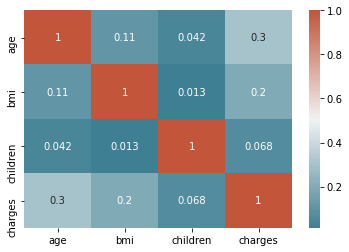

In [8]:
# plot the correlation betwwen variables
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

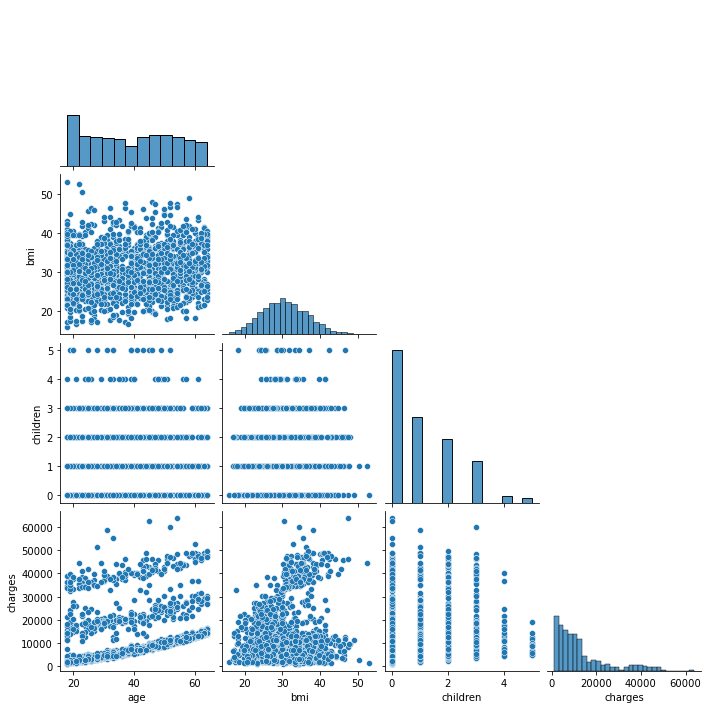

In [9]:
sns.pairplot(data=df.iloc[:,:],corner=True)


In [10]:
a=(df   # average bmi with smoker and nonsmoker
     .groupby(['smoker'])
     .mean()['bmi']
     .to_frame()
     .reset_index()
     .sort_values(by=['bmi']))
a  # smokers and nonsmokers has pretty close bmi, means bmi and smoking has no correlation

,smoker,bmi
0,no,30.651795
1,yes,30.708449


In [11]:
 # average charges with different age group for male/female nonsmokers, male/female smokers
b=(df   
     .groupby(['age','sex', 'smoker'])
     .mean()['charges']
     .to_frame()
     .reset_index()
     .sort_values(by=['charges']))
b 


,age,sex,smoker,charges
18,22,male,no,2396.333532
8,20,female,no,2483.682380
2,18,male,no,2695.672040
16,22,female,no,2705.702227
34,26,male,no,3110.986362
...,...,...,...,...
178,63,male,yes,47055.532100
158,58,male,yes,47496.494450
166,60,male,yes,48892.068923
52,31,female,yes,58571.074480


<AxesSubplot:xlabel='smoker', ylabel='charges'>

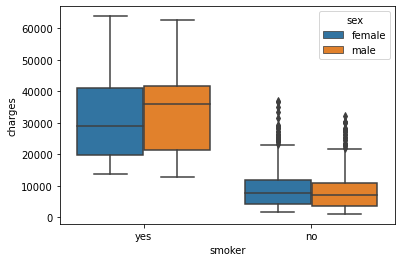

In [12]:
sns.boxplot(data=df,
              y="charges",
              x="smoker",
              hue="sex")
# People who smoke, male smokers has similar populations as female smokers in charges quartile 1 and 4, 
# but population of female smokers are double male smokers in charges quartile 3 and male smokers are double female smokers in charges quartile 2
# With people who don't smoke, male and female have similar charges

<AxesSubplot:xlabel='count', ylabel='smoker'>

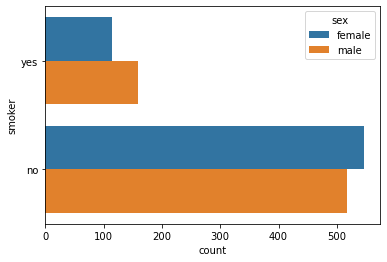

In [13]:
sns.countplot(data=df, y = 'smoker',hue = 'sex')
# from the plot, there are more male smokers than female, more female nonsmokers than male
# also, there are about 20% of female who smoke and 25% male who smoke

<AxesSubplot:xlabel='age', ylabel='charges'>

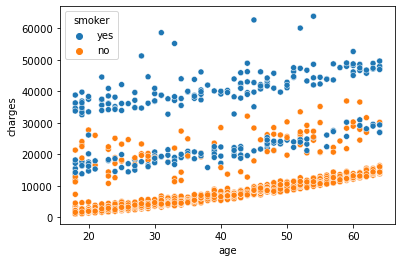

In [26]:
sns.scatterplot(data=df,
              y="charges",
              x="age",
              hue="smoker")
# as age goes bigger, smoker's charges are between $30k to $40k, and nonsmoker's are under $10k

<AxesSubplot:xlabel='sex', ylabel='age'>

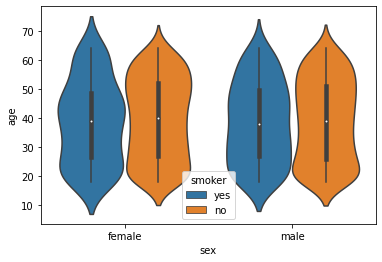

In [27]:
sns.violinplot(data=df,
             y='age',
             x='sex',
             hue='smoker')
# female smokers are mostly around age 20 to 50, and male smokers mostly around age 20 to 60